# Let's play Fifa!⚽️

### Dataset:

- We use the public FIFA video game dataset scraped from https://sofifa.com 
- This dataset has been adopted from the kaggle dataset, which can be found [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset).
- The data lists soccer players from the 2015-2020 editions of EA sports FIFA video game. 
- It consists of player positions, player attributes and personal data.
- The data has been uploaded to this repository in **./fifadataset directory**

### Understanding Dropout & Early Stopping in Multi Layer Perceptron (MLP) models using Player Position Classification Task

This notebook is broadly divided into the following sections:
1. Data Preparation
2. Feature Selection
3. Model Training & Evaluation
    - Unregrularized Model
    - Regularized Model using Early Stopping
    - Regularized Model using Dropout
    - Regularized Model using Early Stopping AND Dropout
4. Can a Professional defender become a forward?
5. Results & Discussion

#### Note:
**Training is done on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19**

**Test Set: Players from the following Clubs**
- FC Barcelona
- FC Bayern München
- Real Madrid 
- Paris Saint-Germain
- Juventus
- Atlético Madrid
- Manchester City
- Liverpool 
- Manchester United

In [ ]:
# Set random seed to ensure reproducible results
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from prettytable import PrettyTable


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
# Read the FIFA player and team datasets
players_19 = pd.read_csv('fifadataset/players_19.csv')
players_20 = pd.read_csv('fifadataset/players_20.csv')

## 1. Data Preparation
- Processing both FIFA 19 and FIFA 20 datasets simultaneously but will only use FIFA 19 for training

In [ ]:
# Check dataset shape
players_19.shape, players_20.shape

((17770, 104), (18278, 104))

In [ ]:
# List all columns of fifa 19 player dataset
print(f'Are the columns in the 2 datasets same? {set(players_19.columns) == set(players_20.columns)}\n')
print('All column names:\n')
print(list(players_19.columns))

Are the columns in the 2 datasets same? True

All column names:

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'mov

In [ ]:
# See the first 5 rows of the dataset
players_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

### 1.1 Remove useless columns

Columns to be removed by intuition:
- player_url - Player profile URL will have no significance in our analysis
- dob - age already captures the same information as date of birth so it can be removed
- real_face - adds no value to our analysis
- nation_jersey_number - jersey number should not add any value to the analysis
- team_jersey_number - jersey number should not add any value to the analysis
- long_name - we already have short_name which should be enough for analysis
- body_type - this info is already captured by height, weight and age columns

In [ ]:
# Remove useless columns from the data
remove_columns = ['player_url', 'dob', 'real_face', 'long_name', 'body_type', 'team_jersey_number', 'nation_jersey_number']
fifa_19 = players_19.drop(remove_columns, axis=1)
fifa_20 = players_20.drop(remove_columns, axis=1)
fifa_19.shape, fifa_20.shape

((17770, 97), (18278, 97))

###1.2 Handling missing values
- Find columns with missing values and percentage of missing values

In [ ]:
# Find columnwise percentage of missing values

total_records = len(fifa_19)
i = 0
col_missing = {}

for col in list(fifa_19.columns):
    missing_values = fifa_19[col].isnull().sum()
    if missing_values > 0:
        col_missing[col] = round((missing_values/total_records) * 100, 2)
        
print(f'Columnwise percentage of missing values:')
for col, perc in sorted(col_missing.items(), key=lambda item : item[1], reverse=True):
    i = i + 1
    print(f'{i}){col} : {perc}%')

Columnwise percentage of missing values:
1)nation_position : 93.79%
2)loaned_from : 92.79%
3)player_tags : 91.47%
4)gk_diving : 88.82%
5)gk_handling : 88.82%
6)gk_kicking : 88.82%
7)gk_reflexes : 88.82%
8)gk_speed : 88.82%
9)gk_positioning : 88.82%
10)player_traits : 54.92%
11)pace : 11.18%
12)shooting : 11.18%
13)passing : 11.18%
14)dribbling : 11.18%
15)defending : 11.18%
16)physic : 11.18%
17)ls : 11.18%
18)st : 11.18%
19)rs : 11.18%
20)lw : 11.18%
21)lf : 11.18%
22)cf : 11.18%
23)rf : 11.18%
24)rw : 11.18%
25)lam : 11.18%
26)cam : 11.18%
27)ram : 11.18%
28)lm : 11.18%
29)lcm : 11.18%
30)cm : 11.18%
31)rcm : 11.18%
32)rm : 11.18%
33)lwb : 11.18%
34)ldm : 11.18%
35)cdm : 11.18%
36)rdm : 11.18%
37)rwb : 11.18%
38)lb : 11.18%
39)lcb : 11.18%
40)cb : 11.18%
41)rcb : 11.18%
42)rb : 11.18%
43)release_clause_eur : 8.51%
44)joined : 8.46%
45)team_position : 1.25%
46)contract_valid_until : 1.25%


In [ ]:
# Find columnwise percentage of missing values

total_records = len(fifa_20)
i = 0
col_missing = {}

for col in list(fifa_20.columns):
    missing_values = fifa_20[col].isnull().sum()
    if missing_values > 0:
        col_missing[col] = round((missing_values/total_records) * 100, 2)
        
print(f'Columnwise percentage of missing values:')
for col, perc in sorted(col_missing.items(), key=lambda item : item[1], reverse=True):
    i = i + 1
    print(f'{i}){col} : {perc}%')

Columnwise percentage of missing values:
1)loaned_from : 94.27%
2)nation_position : 93.84%
3)player_tags : 91.8%
4)gk_diving : 88.86%
5)gk_handling : 88.86%
6)gk_kicking : 88.86%
7)gk_reflexes : 88.86%
8)gk_speed : 88.86%
9)gk_positioning : 88.86%
10)player_traits : 58.61%
11)pace : 11.14%
12)shooting : 11.14%
13)passing : 11.14%
14)dribbling : 11.14%
15)defending : 11.14%
16)physic : 11.14%
17)ls : 11.14%
18)st : 11.14%
19)rs : 11.14%
20)lw : 11.14%
21)lf : 11.14%
22)cf : 11.14%
23)rf : 11.14%
24)rw : 11.14%
25)lam : 11.14%
26)cam : 11.14%
27)ram : 11.14%
28)lm : 11.14%
29)lcm : 11.14%
30)cm : 11.14%
31)rcm : 11.14%
32)rm : 11.14%
33)lwb : 11.14%
34)ldm : 11.14%
35)cdm : 11.14%
36)rdm : 11.14%
37)rwb : 11.14%
38)lb : 11.14%
39)lcb : 11.14%
40)cb : 11.14%
41)rcb : 11.14%
42)rb : 11.14%
43)release_clause_eur : 7.1%
44)joined : 7.05%
45)team_position : 1.31%
46)contract_valid_until : 1.31%


### 1.3 Removing more columns based on missing value percentage
As shown in previous cell, the following columns have high percentage of missing values and can be removed from dataset:
- nation_position
- loaned_from
- player_tags
- player_traits

The other high missing percentage columns are processed next.

In [ ]:
remove_columns = ['nation_position', 'loaned_from', 'player_tags', 'player_traits']
fifa_19 = fifa_19.drop(remove_columns, axis=1)
fifa_20 = fifa_20.drop(remove_columns, axis=1)
fifa_19.shape, fifa_20.shape

((17770, 93), (18278, 93))

### 1.4 Imputing missing values in some columns
- Columns 4-9 shown 2 cells above are goalkeeper skill ratings. Since majority of the players are not goalkeepers hence the value is missing for about 89% players. The missing values in these columns can be safely filled as 0.
- Columns 11-16 are general skills (shooting, passing, etc.) which have about 11% missing values. For these columns, we fill the missing values with median all players ideally will have these skills to some extent.
- Columns 17-42 are position based ratings - they have some missing values which could be because some players have not played at some positions so do not have any ratings at that position. So we can safely fill these values as 0.
- From the last 4 columns, we set the median for release_clause_eur, joined, contract_valid_until
- We can ignore columns joined and team_position as they won't be used as features.

In [ ]:
# Imputing missing goalkeeper ratings with 0
columns = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
fifa_19[columns] = fifa_19[columns].fillna(0)
fifa_20[columns] = fifa_20[columns].fillna(0)

In [ ]:
# Imputing with median values - overall player skill ratings and elease_clause_eur, joined, contract_valid_until
columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 
           'physic', 'release_clause_eur', 'contract_valid_until']

for col in columns:
    fifa_19[col] = fifa_19[col].fillna(fifa_19[col].median())
    fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())

### 1.5 Processing and imputing missing values in position ratings (ls, rf, cf, etc.)

In [ ]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
           'rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
fifa_19[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
# Remove the '+number' or '-number' part in the values a+b 
for col in columns:
    fifa_19[col] = fifa_19[col].str.split('+',n=1,expand = True)[0]
    fifa_19[col] = fifa_19[col].str.split('-',n=1,expand = True)[0]
    fifa_20[col] = fifa_20[col].str.split('+',n=1,expand = True)[0]
    fifa_20[col] = fifa_20[col].str.split('-',n=1,expand = True)[0]
fifa_19[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
1,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58
2,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [ ]:
# Imputing position based ratings
fifa_19[columns] = fifa_19[columns].fillna(0)
fifa_20[columns] = fifa_20[columns].fillna(0)
fifa_19[columns] = fifa_19[columns].astype(int)
fifa_20[columns] = fifa_20[columns].astype(int)
fifa_19[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
1,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58
2,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


### 1.6 Processing preferred_foot column

In [ ]:
fifa_19['preferred_foot'] = fifa_19['preferred_foot'].map({'Right': 0, 'Left': 1})
fifa_20['preferred_foot'] = fifa_20['preferred_foot'].map({'Right': 0, 'Left': 1})

### 1.7 Processing work_rate column

- work_rate column signifies productivity rate of the player and could be a good feature for the classification task. 
- Here we process this categorical variable - one hot encoding

In [ ]:
new_work_rate_19 = fifa_19['work_rate'].str.get_dummies().add_prefix('work_rate_')
new_work_rate_20 = fifa_20['work_rate'].str.get_dummies().add_prefix('work_rate_')
new_work_rate_19.head()

,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0


In [ ]:
fifa_19 = pd.concat([fifa_19, new_work_rate_19], axis = 1)
fifa_20 = pd.concat([fifa_20, new_work_rate_20], axis = 1)

fifa_19 = fifa_19.drop(['work_rate'], axis=1)
fifa_20 = fifa_20.drop(['work_rate'], axis=1)

fifa_19.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",0,5,4,5,127100000.0,LW,2018-07-10,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,1,0,0,0,0,0,0,0
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",1,5,4,4,226500000.0,RW,2004-07-01,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58,0,0,0,0,0,0,0,0,1
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",0,5,5,5,228100000.0,CAM,2017-08-03,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,0,0,1,0,0,0,0,0,0
3,193080,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,260000,GK,0,4,3,1,138600000.0,GK,2011-07-01,2019.0,69.0,54.0,58.0,64.0,56.0,66.0,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",0,4,5,4,196400000.0,RCM,2015-08-30,2023.0,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1,0,0,0,0,0,0,0,0


### 1.8 Dropping irrelevant columns

Dropping the following columns (which also have few missing data):
- joined : this data may not be very useful for our usecase
- team_position : unclear if it will help with analysis, it is also a categorical variable with 29 unique values and will just add to the dimensionality of the problem

In [ ]:
fifa_19 = fifa_19.drop(['joined', 'team_position'], axis=1)
fifa_20 = fifa_20.drop(['joined', 'team_position'], axis=1)
fifa_19.shape, fifa_20.shape

((17770, 99), (18278, 99))

### 1.9 Verify if all missing values handled

In [ ]:
print('Missing values in FIFA 19 dataset: ' + str(fifa_19.isna().sum().sum()))

Missing values in FIFA 19 dataset: 0


In [ ]:
print('Missing values in FIFA 20 dataset: ' + str(fifa_20.isna().sum().sum()))

Missing values in FIFA 20 dataset: 0


### 1.10 Processing player_positions column

- **player_positions** is our response variable for the classfication task
- Some players have multiple positions.
- To make our task simpler, for a given player we choose the position which has the highest rating given by the corresponding position ratings column.
- This approach makes more sense than choosing any random position. 
- For example, Messi has player_positions - CF, RW, ST with Rating at these positions - 93, 92, 88 as seen in the cell below
- So, we choose CF as the player_positions value since it has the highest rating. 

In [ ]:
fifa_19[['short_name', 'player_positions', 'cf', 'rw', 'st']].head()

,short_name,player_positions,cf,rw,st
0,Cristiano Ronaldo,"ST, LW",90,89,91
1,L. Messi,"CF, RW, ST",93,92,88
2,Neymar Jr,"LW, CAM",89,89,84
3,De Gea,GK,0,0,0
4,K. De Bruyne,"CAM, CM",87,87,82


**1. One-hot encode the player_positions variable.**

In [ ]:
new_player_position_19 = fifa_19['player_positions'].str.get_dummies(sep=', ').add_prefix('player_position_')
new_player_position_20 = fifa_20['player_positions'].str.get_dummies(sep=', ').add_prefix('player_position_')
new_player_position_19.head()

,player_position_CAM,player_position_CB,player_position_CDM,player_position_CF,player_position_CM,player_position_GK,player_position_LB,player_position_LM,player_position_LW,player_position_LWB,player_position_RB,player_position_RM,player_position_RW,player_position_RWB,player_position_ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0




**2. Concatenate the one-hot encoded variable to the dataset and drop the original column**

In [ ]:
fifa_19 = pd.concat([fifa_19, new_player_position_19], axis = 1)
fifa_20 = pd.concat([fifa_20, new_player_position_20], axis = 1)

fifa_19 = fifa_19.drop(['player_positions'], axis=1)
fifa_20 = fifa_20.drop(['player_positions'], axis=1)

fifa_19.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,player_position_CAM,player_position_CB,player_position_CDM,player_position_CF,player_position_CM,player_position_GK,player_position_LB,player_position_LM,player_position_LW,player_position_LWB,player_position_RB,player_position_RM,player_position_RW,player_position_RWB,player_position_ST
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,0,5,4,5,127100000.0,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,565000,1,5,4,4,226500000.0,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,0,5,5,5,228100000.0,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,193080,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,260000,0,4,3,1,138600000.0,2019.0,69.0,54.0,58.0,64.0,56.0,66.0,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,355000,0,4,5,4,196400000.0,2023.0,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**3. Ensure that all unique player_positions obtained have corresponding position rating column.**

In [ ]:
# Get all dummy columns of player_positions
player_positions_cols_19 = [col for col in fifa_19 if col.startswith('player_position_')]
player_positions_cols_20 = [col for col in fifa_20 if col.startswith('player_position_')]

# Get positions not having corresponding position ratings
no_rating_pos_19 = []
for col in player_positions_cols_19:
    position = col.split('_')[-1]
    position = position.lower()
    if position not in list(fifa_19.columns):
        no_rating_pos_19.append(position)
        
# Get positions not having corresponding position ratings
no_rating_pos_20 = []
for col in player_positions_cols_20:
    position = col.split('_')[-1]
    position = position.lower()
    if position not in list(fifa_20.columns):
        no_rating_pos_20.append(position)
        
print('FIFA19 : Player positions not having any position rating column: ', no_rating_pos_19)
print('FIFA20 : Player positions not having any position rating column: ', no_rating_pos_20)

FIFA19 : Player positions not having any position rating column:  ['gk']
FIFA20 : Player positions not having any position rating column:  ['gk']


**4. As seen from the above output, 'gk' (goalkeeper) position does not have a dedicated single column for rating.** 

So, we create a new column - 'gk' - for goalkeeper position rating by taking the average of the values in the following columns - 
- gk_diving
- gk_handling
- gk_kicking
- gk_reflexes
- gk_speed
- gk_positioning

In [ ]:
gk_cols = [col for col in fifa_19 if col.startswith('gk_')]
fifa_19['gk'] = fifa_19[gk_cols].mean(axis=1)
fifa_20['gk'] = fifa_20[gk_cols].mean(axis=1)
fifa_19[['short_name', 'gk'] + gk_cols].head(10)

,short_name,gk,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,Cristiano Ronaldo,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,L. Messi,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Neymar Jr,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,De Gea,83.666667,90.0,85.0,87.0,94.0,58.0,88.0
4,K. De Bruyne,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,Sergio Ramos,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,L. Suárez,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,L. Modrić,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,E. Hazard,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,J. Oblak,80.833333,86.0,92.0,78.0,89.0,52.0,88.0


**5. For players with multiple player_position values, we now ensure only one of them is selected based on the highest rated position.**

Examine the data and notice that some players have multiple positions

In [ ]:
# See the player_position_values
fifa_19[['short_name'] + [col for col in fifa_19 if col.startswith('player_position_')]].head(5)

,short_name,player_position_CAM,player_position_CB,player_position_CDM,player_position_CF,player_position_CM,player_position_GK,player_position_LB,player_position_LM,player_position_LW,player_position_LWB,player_position_RB,player_position_RM,player_position_RW,player_position_RWB,player_position_ST
0,Cristiano Ronaldo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,L. Messi,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,Neymar Jr,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,De Gea,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,K. De Bruyne,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Retain only the best position for the player according to rating.**

In [ ]:
# player position columns
player_pos_cols = [col for col in fifa_19 if col.startswith('player_position_')]

def best_player_position(data):
    
    # Make a copy of the dataset to work on
    df = data.copy()
    
    # Iterate through all rows
    for idx, row in df.iterrows():
        
        # Calculate number of player positions set to 1
        num_positions = (row[player_pos_cols] == 1).sum()
        
        # Continue to next iteration if number of positions is less than or equal to 1
        if num_positions <= 1:
            continue
            
        # Get the columns which have player_position == 1
        position_cols = list(np.array(player_pos_cols)[row[player_pos_cols] == 1])
        positions = [col.split('_')[-1].lower() for col in position_cols]

        # Get the position with highest rating
        best_position = row.loc[positions].astype('float64').idxmax()
        
        # Remove best_position column from position_cols
        position_cols.remove('player_position_' + best_position.upper())
        
        # Set remaining columns to 0
        df.loc[idx, position_cols] = 0
        
    return df

In [ ]:
fifa_19 = best_player_position(fifa_19)
fifa_20 = best_player_position(fifa_20)

**6. Verifying that each row has only one player_position set to 1**

In [ ]:
print('FIFA 19: ')
print(f'Total number of rows = {len(fifa_19)}')
print('Total number of player positions', (fifa_19[player_pos_cols] == 1).sum(axis=1).sum())
print('FIFA 20: ')
print(f'Total number of rows = {len(fifa_20)}')
print('Total number of player positions', (fifa_20[player_pos_cols] == 1).sum(axis=1).sum())

FIFA 19: 
Total number of rows = 17770
Total number of player positions 17770
FIFA 20: 
Total number of rows = 18278
Total number of player positions 18278


### 1.11 Processing other columns with object dtype

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fifa_19.dtypes)

sofifa_id                       int64
short_name                     object
age                             int64
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
preferred_foot                  int64
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
contract_valid_until          float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes 

**From the above output, we see that there are more columns with object dtype.**

- We disregard short_name, nationality and club because they will not be used in our feature list
- There are many other columns like attacking_crossing, attacking_finishing, skill_dribbling, etc. which are object dtypes. Lets inspect them further.

In [ ]:
fifa_19['attacking_crossing'].values[-100:]

array(['36', '38', '14', '10', '11', '20', '36', '40', '28', '35', '29',
       '36', '13', '30', '43', '32', '10', '32-1', '40', '38', '13', '42',
       '32', '52', '23', '46', '14', '14', '40', '10', '10', '36', '48',
       '27', '40', '41', '23', '36', '31', '41', '47', '18', '48', '40',
       '26', '41', '42', '46', '14', '34', '48', '34', '32', '12', '46',
       '42', '31', '54', '19', '31', '45', '10', '13', '35', '38', '37',
       '38', '12', '39', '36', '34', '40', '28', '19', '41', '52', '42',
       '11', '51', '25', '35', '32-1', '34', '23', '31', '47+6', '10',
       '35', '36', '39+2', '28', '41', '27', '34', '31', '31', '37', '40',
       '39', '37'], dtype=object)

**We see that there are values like '32-1' and '47+6'. We have to remove the +x and -x parts of the columns and convert column to int.**

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fifa_20.dtypes)

sofifa_id                       int64
short_name                     object
age                             int64
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
preferred_foot                  int64
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
contract_valid_until          float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes 

**In FIFA 20 dataset, the same columns are int64 so there is no need to change anything.**

**We remove the '+x' and '-x' part for the object columns with integer values**

In [ ]:
# Remove the '+number' or '-number' part in the values a+b 

# Skip these object columns
skip_cols = ['short_name', 'nationality', 'club']

# Find all object columns except skip_cols
columns = [col for col in list(fifa_19.select_dtypes(['object']).columns) if col not in skip_cols]

for col in columns:
    fifa_19[col] = fifa_19[col].str.split('+',n=1,expand = True)[0]
    fifa_19[col] = fifa_19[col].str.split('-',n=1,expand = True)[0]
    
fifa_19[columns] = fifa_19[columns].astype(int)

## 2. Feature Selection

In [ ]:
fifa_19.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,player_position_CAM,player_position_CB,player_position_CDM,player_position_CF,player_position_CM,player_position_GK,player_position_LB,player_position_LM,player_position_LW,player_position_LWB,player_position_RB,player_position_RM,player_position_RW,player_position_RWB,player_position_ST,gk
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,0,5,4,5,127100000.0,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,565000,1,5,4,4,226500000.0,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,0,5,5,5,228100000.0,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
3,193080,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,260000,0,4,3,1,138600000.0,2019.0,69.0,54.0,58.0,64.0,56.0,66.0,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,83.666667
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,355000,0,4,5,4,196400000.0,2023.0,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
remove_features = ['sofifa_id', 'short_name', 'nationality', 'club']

# Calculate number of unique values per feature
for feature in remove_features:
    print(f'Unique values in {feature} = {len(fifa_19[feature].unique())}')

Unique values in sofifa_id = 17770
Unique values in short_name = 16811
Unique values in nationality = 160
Unique values in club = 679


**By intuition, we can remove the following columns from our final feature list:**

- **sofifa_id** : This is just a player's sofifa ID which does not affect player position
- **short_name** : This is the name of the player and should not have any value
- **nationality** : Player's country should not hold much value to player position. Even if it does, it has 160 unique values as shown above and one-hot encoding them will increase the dimensionality of train and test sets.
- **club** : Same reason as nationality

In [ ]:
response_variables = [col for col in fifa_19 if col.startswith('player_position_')]
fifa_19[response_variables].head()

,player_position_CAM,player_position_CB,player_position_CDM,player_position_CF,player_position_CM,player_position_GK,player_position_LB,player_position_LM,player_position_LW,player_position_LWB,player_position_RB,player_position_RM,player_position_RW,player_position_RWB,player_position_ST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Remove response_variables and remove_features from predictors
predictors = [feature for feature in fifa_19 if feature not in remove_features and feature not in response_variables]
fifa_19[predictors].head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,gk
0,33,187,83,94,94,77000000,405000,0,5,4,5,127100000.0,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,1,0,0,0,0,0,0,0,0.000000
1,31,170,72,94,94,110500000,565000,1,5,4,4,226500000.0,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58,0,0,0,0,0,0,0,0,1,0.000000
2,26,175,68,92,93,118500000,290000,0,5,5,5,228100000.0,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,0,0,1,0,0,0,0,0,0,0.000000
3,27,193,76,91,93,72000000,260000,0,4,3,1,138600000.0,2019.0,69.0,54.0,58.0,64.0,56.0,66.0,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,83.666667
4,27,181,70,91,92,102000000,355000,0,4,5,4,196400000.0,2023.0,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1,0,0,0,0,0,0,0,0,0.000000


In [ ]:
print(f'Total number of predictors/features = {len(predictors)}')
print(f'Total number of response/target variables = {len(response_variables)} (one-hot encoded player_positions)')

Total number of predictors/features = 95
Total number of response/target variables = 15 (one-hot encoded player_positions)


## 3. Model Training and Evaluation

**Generate test data and store it.**

According to the problem statement, test data should be taken from FIFA 20 dataset for the following clubs:

- FC Barcelona
- FC Bayern München
- Real Madrid 
- Paris Saint-Germain
- Juventus
- Atlético Madrid
- Manchester City
- Liverpool 
- Manchester United

In [ ]:
# Get clubs in test set 
test_set_clubs = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', 'Paris Saint-Germain', 'Juventus', 
                  'Atlético Madrid', 'Manchester City', 'Liverpool', 'Manchester United']

In [ ]:
# Generate test data
X_test = fifa_20.loc[fifa_20['club'].isin(test_set_clubs) , predictors]
y_test = fifa_20.loc[fifa_20['club'].isin(test_set_clubs) , response_variables]

print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_test.shape = (287, 95)
y_test.shape = (287, 15)


**Generate Train and Validation sets.**

In [ ]:
# Generate train and validation sets using stratified splits
fifa_19_train, fifa_19_val = train_test_split(fifa_19, train_size=0.75, random_state=1, stratify=fifa_19[response_variables])

X_train = fifa_19_train[predictors]
X_val = fifa_19_val[predictors]

y_train = fifa_19_train[response_variables]
y_val = fifa_19_val[response_variables]

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_val.shape = {X_val.shape}')
print(f'y_val.shape = {y_val.shape}')

X_train.shape = (13327, 95)
y_train.shape = (13327, 15)
X_val.shape = (4443, 95)
y_val.shape = (4443, 15)


**Standardize the predictors.**

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.fit_transform(X_val)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
input_shape = X_train.shape[1]

output_shape = y_train.shape[1]

hidden_nodes = 256

print('Input shape = ', input_shape)
print('Output shape = ', output_shape)

Input shape =  95
Output shape =  15


### 3.1 Unregularized Model

In [ ]:
inputs = keras.Input(shape=(input_shape,))

hidden = layers.Dense(hidden_nodes, activation="relu")(inputs)
hidden = layers.Dense(hidden_nodes, activation="relu")(hidden)
hidden = layers.Dense(hidden_nodes, activation="relu")(hidden)
hidden = layers.Dense(hidden_nodes, activation="relu")(hidden)
hidden = layers.Dense(hidden_nodes, activation="relu")(hidden)

outputs = layers.Dense(output_shape, activation="softmax", name="output_layer")(hidden)

model = keras.Model(inputs=inputs, outputs=outputs, name="fifa_position_classifier")

In [ ]:
model.summary()

Model: "fifa_position_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 95)]              0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               24576     
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 15)   

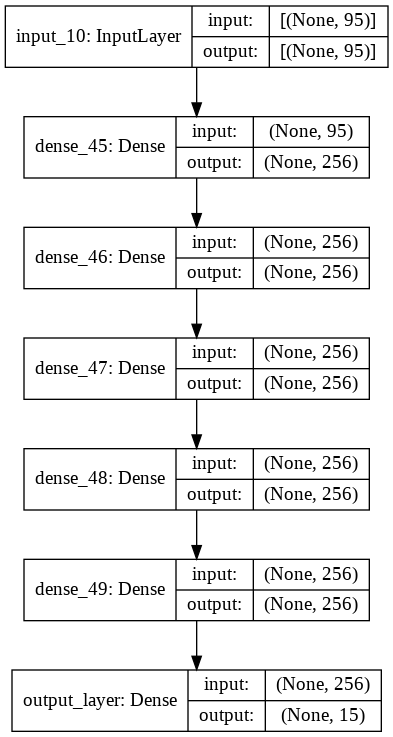

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"],
)

history_unreg = model.fit(X_train_std, y_train, batch_size=32, epochs=50, validation_data=(X_val_std, y_val), verbose=1)

Epoch 1/50
417/417 [==============================] - 3s 6ms/step - loss: 0.9001 - accuracy: 0.6833 - val_loss: 0.7768 - val_accuracy: 0.7254
Epoch 2/50
417/417 [==============================] - 2s 6ms/step - loss: 0.7330 - accuracy: 0.7345 - val_loss: 0.7364 - val_accuracy: 0.7326
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 0.6948 - accuracy: 0.7474 - val_loss: 0.6956 - val_accuracy: 0.7524
Epoch 4/50
417/417 [==============================] - 2s 5ms/step - loss: 0.6655 - accuracy: 0.7558 - val_loss: 0.7310 - val_accuracy: 0.7277
Epoch 5/50
417/417 [==============================] - 2s 6ms/step - loss: 0.6476 - accuracy: 0.7635 - val_loss: 0.7256 - val_accuracy: 0.7432
Epoch 6/50
417/417 [==============================] - 2s 6ms/step - loss: 0.6300 - accuracy: 0.7680 - val_loss: 0.7099 - val_accuracy: 0.7490
Epoch 7/50
417/417 [==============================] - 2s 6ms/step - loss: 0.6129 - accuracy: 0.7723 - val_loss: 0.7555 - val_accuracy: 0.7355
Epoch 

In [ ]:
test_scores_unreg = model.evaluate(X_test_std, y_test, verbose=0)
print('Unregularized Model Scores: ')
print("Test loss:", test_scores_unreg[0])
print("Test accuracy:", test_scores_unreg[1])

Unregularized Model Scores: 
Test loss: 1.7762447595596313
Test accuracy: 0.7282230257987976


In [ ]:
# Here we plot the training and validation loss and accuracy
def plot_losses(history, title):
    fig, ax = plt.subplots(1,2,figsize = (16,4))
    ax[0].plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
    ax[0].plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
    ax[1].plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
    ax[1].plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy');
    fig.suptitle(title, fontsize = 24)

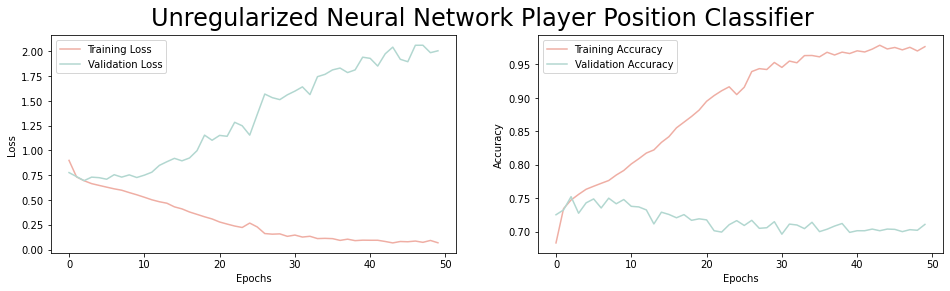

In [ ]:
plot_losses(history_unreg, 'Unregularized Neural Network Player Position Classifier')

- We notice in the above figure that after some epochs, the **validation loss starts increasing whereas the training loss is still decreasing**. 
- This means that we are **OVERFITTING** on the training set. 
- We can now improve this model by implementing **Early Stopping** - a technique that stops the training earlier than set epochs if we have reached the best validation loss.

### 3.2 Regularized Model using Early Stopping

In [ ]:
inputs = keras.Input(shape=(input_shape,))

hidden = layers.Dense(256, activation="relu")(inputs)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)

outputs = layers.Dense(output_shape, activation="softmax", name="output_layer")(hidden)

model_early = keras.Model(inputs=inputs, outputs=outputs, name="fifa_position_classifier_early_stopping")

In [ ]:
model_early.summary()

Model: "fifa_position_classifier_early_stopping"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 95)]              0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               24576     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)       

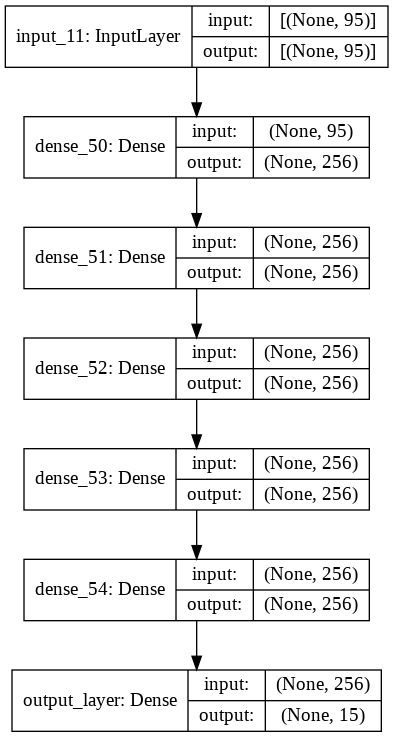

In [ ]:
keras.utils.plot_model(model_early, show_shapes=True)

In [ ]:
model_early.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"],
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_early = model_early.fit(X_train_std, y_train, batch_size=32, epochs=50, validation_data=(X_val_std, y_val), verbose=1, callbacks=[callback])

Epoch 1/50
417/417 [==============================] - 4s 8ms/step - loss: 0.8927 - accuracy: 0.6867 - val_loss: 0.7897 - val_accuracy: 0.7196
Epoch 2/50
417/417 [==============================] - 3s 7ms/step - loss: 0.7301 - accuracy: 0.7366 - val_loss: 0.7594 - val_accuracy: 0.7259
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 0.6946 - accuracy: 0.7497 - val_loss: 0.6965 - val_accuracy: 0.7479
Epoch 4/50
417/417 [==============================] - 3s 8ms/step - loss: 0.6652 - accuracy: 0.7518 - val_loss: 0.7450 - val_accuracy: 0.7229
Epoch 5/50
417/417 [==============================] - 3s 8ms/step - loss: 0.6489 - accuracy: 0.7669 - val_loss: 0.7226 - val_accuracy: 0.7434
Epoch 6/50
417/417 [==============================] - 3s 8ms/step - loss: 0.6328 - accuracy: 0.7668 - val_loss: 0.7233 - val_accuracy: 0.7407
Epoch 7/50
417/417 [==============================] - 3s 7ms/step - loss: 0.6140 - accuracy: 0.7708 - val_loss: 0.7668 - val_accuracy: 0.7261
Epoch 

**Notice that the training stops early since we are doing early stopping with patience=5.**

In [ ]:
test_scores_early = model_early.evaluate(X_test_std, y_test, verbose=0)
print('Early Stopping Model Scores: ')
print("Test loss:", test_scores_early[0])
print("Test accuracy:", test_scores_early[1])

Early Stopping Model Scores: 
Test loss: 0.6727602481842041
Test accuracy: 0.7421602606773376


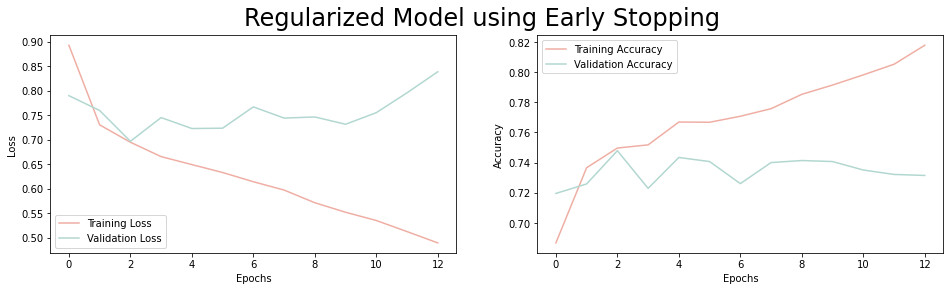

In [ ]:
plot_losses(history_early, 'Regularized Model using Early Stopping')

- Model **stops training early** when it finds the lowest validation loss.
- **Patience is set to 10** so it trains for 10 epochs more than the epoch at which lowest validation loss was found.

### 3.3 Regularized Model using Dropout

In [ ]:
inputs = keras.Input(shape=(input_shape,))

hidden = layers.Dense(256, activation="relu")(inputs)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)

outputs = layers.Dense(output_shape, activation="softmax", name="output_layer")(hidden)

model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="fifa_position_classifier_dropout")

In [ ]:
model_dropout.summary()

Model: "fifa_position_classifier_dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 95)]              0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               24576     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None

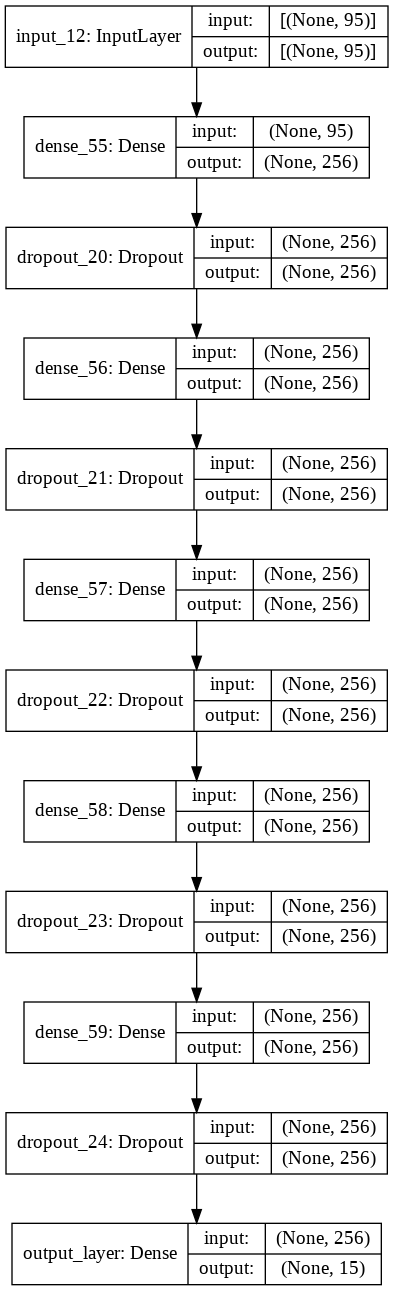

In [ ]:
keras.utils.plot_model(model_dropout, show_shapes=True)

In [ ]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"],
)

history_dropout = model_dropout.fit(X_train_std, y_train, batch_size=32, epochs=50, validation_data=(X_val_std, y_val), verbose=1)

Epoch 1/50
417/417 [==============================] - 5s 9ms/step - loss: 1.0441 - accuracy: 0.6390 - val_loss: 0.8123 - val_accuracy: 0.7189
Epoch 2/50
417/417 [==============================] - 4s 10ms/step - loss: 0.8205 - accuracy: 0.7113 - val_loss: 0.7488 - val_accuracy: 0.7378
Epoch 3/50
417/417 [==============================] - 4s 11ms/step - loss: 0.7804 - accuracy: 0.7260 - val_loss: 0.7015 - val_accuracy: 0.7515
Epoch 4/50
417/417 [==============================] - 4s 11ms/step - loss: 0.7419 - accuracy: 0.7376 - val_loss: 0.7432 - val_accuracy: 0.7326
Epoch 5/50
417/417 [==============================] - 4s 11ms/step - loss: 0.7365 - accuracy: 0.7387 - val_loss: 0.7388 - val_accuracy: 0.7414
Epoch 6/50
417/417 [==============================] - 4s 10ms/step - loss: 0.7189 - accuracy: 0.7456 - val_loss: 0.7104 - val_accuracy: 0.7515
Epoch 7/50
417/417 [==============================] - 5s 11ms/step - loss: 0.7050 - accuracy: 0.7496 - val_loss: 0.7136 - val_accuracy: 0.7511


In [ ]:
test_scores_dropout = model_dropout.evaluate(X_test_std, y_test, verbose=0)
print('Dropout Model Scores: ')
print("Test loss:", test_scores_dropout[0])
print("Test accuracy:", test_scores_dropout[1])

Dropout Model Scores: 
Test loss: 0.7723937630653381
Test accuracy: 0.7421602606773376


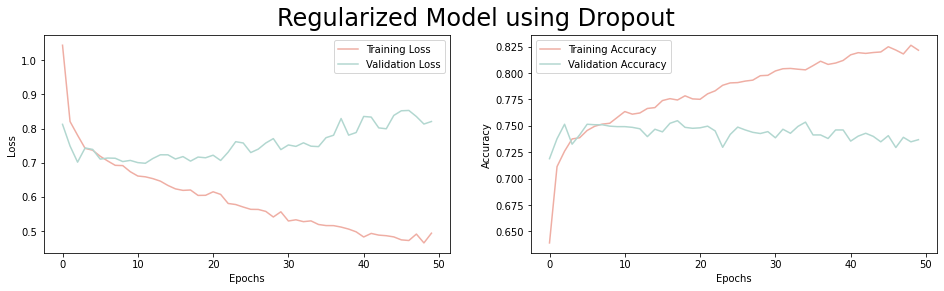

In [ ]:
plot_losses(history_dropout, 'Regularized Model using Dropout')

- We see that the after some epochs the training loss starts decreasing rapidly.
- However, the validation loss does not increase too much. It increases relatively lesser than the unregulaized model

### 3.4 Regularized Model using both Dropout and Early Stopping

In [ ]:
inputs = keras.Input(shape=(input_shape,))

hidden = layers.Dense(256, activation="relu")(inputs)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)
hidden = layers.Dense(256, activation="relu")(hidden)
hidden = layers.Dropout(rate=0.2)(hidden)

outputs = layers.Dense(output_shape, activation="softmax", name="output_layer")(hidden)

model_hybrid = keras.Model(inputs=inputs, outputs=outputs, name="fifa_position_classifier_hybrid")

In [ ]:
model_hybrid.summary()

Model: "fifa_position_classifier_hybrid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 95)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               24576     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_27 (Dropout)         (None,

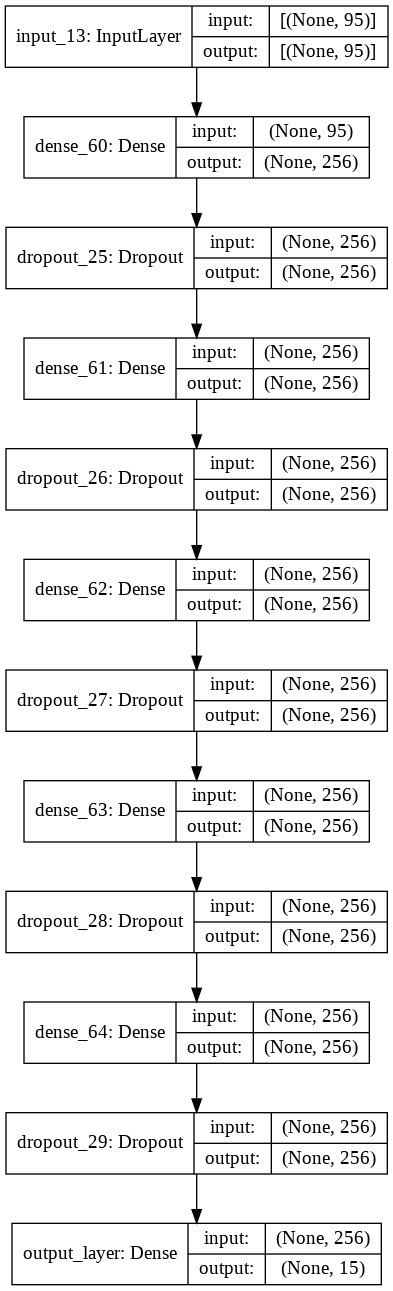

In [ ]:
keras.utils.plot_model(model_hybrid, show_shapes=True)

In [ ]:
model_hybrid.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"],
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_hybrid = model_hybrid.fit(X_train_std, y_train, batch_size=32, epochs=50, validation_data=(X_val_std, y_val), verbose=1, callbacks=[callback])

Epoch 1/50
417/417 [==============================] - 5s 9ms/step - loss: 1.0447 - accuracy: 0.6397 - val_loss: 0.7973 - val_accuracy: 0.7207
Epoch 2/50
417/417 [==============================] - 3s 8ms/step - loss: 0.8203 - accuracy: 0.7140 - val_loss: 0.7521 - val_accuracy: 0.7304
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 0.7776 - accuracy: 0.7236 - val_loss: 0.7019 - val_accuracy: 0.7421
Epoch 4/50
417/417 [==============================] - 3s 7ms/step - loss: 0.7394 - accuracy: 0.7333 - val_loss: 0.7101 - val_accuracy: 0.7459
Epoch 5/50
417/417 [==============================] - 3s 8ms/step - loss: 0.7207 - accuracy: 0.7478 - val_loss: 0.7479 - val_accuracy: 0.7355
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 0.7248 - accuracy: 0.7406 - val_loss: 0.7159 - val_accuracy: 0.7508
Epoch 7/50
417/417 [==============================] - 3s 7ms/step - loss: 0.7070 - accuracy: 0.7435 - val_loss: 0.7457 - val_accuracy: 0.7297
Epoch 

In [ ]:
test_scores_hybrid = model_hybrid.evaluate(X_test_std, y_test, verbose=0)
print('Hybrid Model (Dropout & Early Stopping) Scores: ')
print("Test loss:", test_scores_hybrid[0])
print("Test accuracy:", test_scores_hybrid[1])

Hybrid Model (Dropout & Early Stopping) Scores: 
Test loss: 0.6316640973091125
Test accuracy: 0.7595818638801575


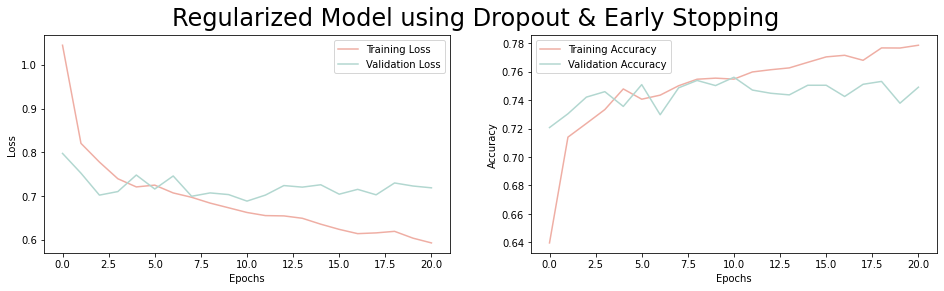

In [ ]:
plot_losses(history_hybrid, 'Regularized Model using Dropout & Early Stopping')

- We notice that the training loss doesn't increase as seen in the previous models.
- Since we are using two regularization techniques - Dropout and Early stopping - the model does not overfit
- This is the reason the test accuracy is of 75.96% is the highest

## 4. Can a professional defender become a forward?

In [ ]:
response_variables

['player_position_CAM',
 'player_position_CB',
 'player_position_CDM',
 'player_position_CF',
 'player_position_CM',
 'player_position_GK',
 'player_position_LB',
 'player_position_LM',
 'player_position_LW',
 'player_position_LWB',
 'player_position_RB',
 'player_position_RM',
 'player_position_RW',
 'player_position_RWB',
 'player_position_ST']

**Define list of defender positions present in dataset**

In [ ]:
defender_positions = ['player_position_CB', 'player_position_LB', 'player_position_LWB',
                      'player_position_RB', 'player_position_RWB']

**Define list of forward positions present in dataset**

In [ ]:
forward_positions = ['player_position_CF', 'player_position_ST', 'player_position_LW', 'player_position_RW']

**Get all players from FIFA 19 playing in defender positions**

In [ ]:
fifa19_defenders = fifa_19[fifa_19[defender_positions].any(axis=1)]
# Print first 10 defenders with their name and positions
fifa19_defenders[['short_name'] + defender_positions].head(10)

,short_name,player_position_CB,player_position_LB,player_position_LWB,player_position_RB,player_position_RWB
5,Sergio Ramos,1,0,0,0,0
12,D. Godín,1,0,0,0,0
21,G. Chiellini,1,0,0,0,0
24,M. Hummels,1,0,0,0,0
34,Thiago Silva,1,0,0,0,0
38,Marcelo,0,1,0,0,0
42,S. Umtiti,1,0,0,0,0
43,K. Koulibaly,1,0,0,0,0
46,Piqué,1,0,0,0,0
49,J. Vertonghen,1,0,0,0,0


**Find number of defenders in FIFA 19 who became forwards in FIFA 20**

Steps:

- For each defender in FIFA 19, do the following: 
    - Get sofifa id of player
    - Find player in FIFA 20 using sofifa id
    - Check player's position in FIFA 20
    - If position is forward, store the player and increase count
    - If position is not forward, continue to next iteration

In [ ]:
# Create lists to store 'sofifa_id' of defenders who became forwards and those who did not and those who are not present in FIFA 20
def_to_fwd = {}
def_not_to_fwd = []
def_not_present = []

# Iterate through all rows of defenders dataframe
for idx, row in fifa19_defenders.iterrows():

    # Flag to check if defender converted to forward
    converted = False    

    # sofifa_id of defender
    sofifa_id = row['sofifa_id']
    
    # Find this player in FIFA 20 dataset
    fifa20_stats = fifa_20[fifa_20['sofifa_id'] == sofifa_id]
    
    # If player not found in FIFA 20 dataset, store sofifa_id and continue to next iteration
    if len(fifa20_stats) == 0:
        def_not_present.append(sofifa_id)
        continue

    # Forward positions data in FIFA 20 for current player
    for col in forward_positions:
        if fifa20_stats[col].all() == 1:
            def_to_fwd[sofifa_id] = col
            converted = True
            break
    
    if not converted:
        def_not_to_fwd.append(sofifa_id)

In [ ]:
# Total number of defenders in FIFA 19
num_defenders19 = len(fifa19_defenders)

# Total number of defenders in FIFA 19 who became forwards in FIFA 20
def_to_fwd_count = len(def_to_fwd)

# Total number of defenders in FIFA 19 who did not become forwards in FIFA 20
def_not_to_fwd_count = len(def_not_to_fwd)

# Total number of defenders in FIFA 19 not found in FIFA 20 dataset
def_not_present_count = len(def_not_present)

print(f'Total number of defenders in FIFA 19 (also present in FIFA 20 dataset) = {num_defenders19 - def_not_present_count}')
print(f'Number of defenders in FIFA 19 who became forwards in FIFA 20 = {def_to_fwd_count}')
print(f'Number of defenders in FIFA 19 who did not become forwards in FIFA 20 = {def_not_to_fwd_count}')
print(f'Percentage conversion of defenders to forwards from FIFA 19 to FIFA 20 = {round((def_to_fwd_count/(num_defenders19 - def_not_present_count)) * 100, 2)} %')

Total number of defenders in FIFA 19 (also present in FIFA 20 dataset) = 4387
Number of defenders in FIFA 19 who became forwards in FIFA 20 = 4
Number of defenders in FIFA 19 who did not become forwards in FIFA 20 = 4383
Percentage conversion of defenders to forwards from FIFA 19 to FIFA 20 = 0.09 %


In [ ]:
converted_defenders_19 = fifa_19[fifa_19['sofifa_id'].isin(list(def_to_fwd.keys()))]
converted_defenders_20 = fifa_20[fifa_20['sofifa_id'].isin(list(def_to_fwd.keys()))]

not_converted_defenders_19 = fifa_19[fifa_19['sofifa_id'].isin(def_not_to_fwd)]
not_converted_defenders_20 = fifa_20[fifa_20['sofifa_id'].isin(def_not_to_fwd)]

## 5. Results and Discussion

### 5.1 Player position classification task

**Plot the validation & training loss for the four models**

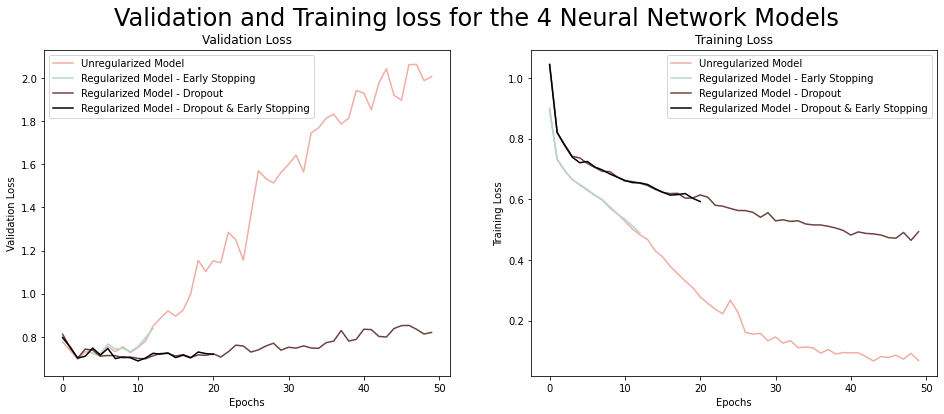

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,6))

ax[0].plot(history_unreg.history['val_loss'],color='#EFAEA4',label = 'Unregularized Model')
ax[0].plot(history_early.history['val_loss'],color='#B2D7D0',label = 'Regularized Model - Early Stopping')
ax[0].plot(history_dropout.history['val_loss'],color='#6F4242',label = 'Regularized Model - Dropout')
ax[0].plot(history_hybrid.history['val_loss'],color='black',label = 'Regularized Model - Dropout & Early Stopping')

ax[1].plot(history_unreg.history['loss'],color='#EFAEA4',label = 'Unregularized Model')
ax[1].plot(history_early.history['loss'],color='#B2D7D0',label = 'Regularized Model - Early Stopping')
ax[1].plot(history_dropout.history['loss'],color='#6F4242',label = 'Regularized Model - Dropout')
ax[1].plot(history_hybrid.history['loss'],color='black',label = 'Regularized Model - Dropout & Early Stopping')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')

ax[0].set_ylabel('Validation Loss')
ax[1].set_ylabel('Training Loss')

ax[0].set_title('Validation Loss')
ax[1].set_title('Training Loss')

fig.suptitle('Validation and Training loss for the 4 Neural Network Models', fontsize = 24)
plt.show()

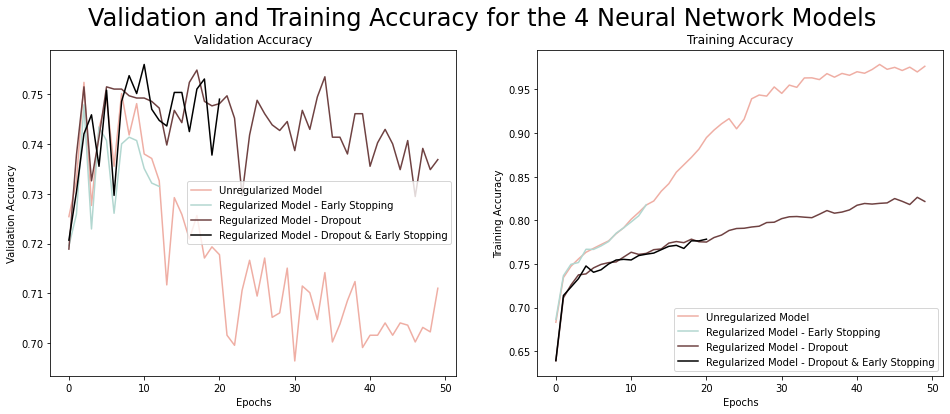

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,6))

ax[0].plot(history_unreg.history['val_accuracy'],color='#EFAEA4',label = 'Unregularized Model')
ax[0].plot(history_early.history['val_accuracy'],color='#B2D7D0',label = 'Regularized Model - Early Stopping')
ax[0].plot(history_dropout.history['val_accuracy'],color='#6F4242',label = 'Regularized Model - Dropout')
ax[0].plot(history_hybrid.history['val_accuracy'],color='black',label = 'Regularized Model - Dropout & Early Stopping')

ax[1].plot(history_unreg.history['accuracy'],color='#EFAEA4',label = 'Unregularized Model')
ax[1].plot(history_early.history['accuracy'],color='#B2D7D0',label = 'Regularized Model - Early Stopping')
ax[1].plot(history_dropout.history['accuracy'],color='#6F4242',label = 'Regularized Model - Dropout')
ax[1].plot(history_hybrid.history['accuracy'],color='black',label = 'Regularized Model - Dropout & Early Stopping')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')

ax[0].set_ylabel('Validation Accuracy')
ax[1].set_ylabel('Training Accuracy')

ax[0].set_title('Validation Accuracy')
ax[1].set_title('Training Accuracy')

fig.suptitle('Validation and Training Accuracy for the 4 Neural Network Models', fontsize = 24)
plt.show()

**Observations:**

- We observe that the unregularized model accuracy decreases after some epoch although the training accuracy is increasing
- In comparison, the regularized model do well to not decrease validation accuracy too much as training accuracy increases
- They help in avoiding overfitting


In [ ]:
model_comparison = PrettyTable()
model_comparison.field_names = ['Player Position Classifier', 'Test Accuracy', 'Test Loss']
model_comparison.add_row(['Unregularized Model', test_scores_unreg[1], test_scores_unreg[0]])
model_comparison.add_row(['Regularized Model - Early Stopping', test_scores_early[1], test_scores_early[0]])
model_comparison.add_row(['Regularized Model - Dropout', test_scores_dropout[1], test_scores_dropout[0]])
model_comparison.add_row(['Regularized Model - Dropout & Early Stopping', test_scores_hybrid[1], test_scores_hybrid[0]])

In [ ]:
print(model_comparison)

+----------------------------------------------+--------------------+--------------------+
|          Player Position Classifier          |   Test Accuracy    |     Test Loss      |
+----------------------------------------------+--------------------+--------------------+
|             Unregularized Model              | 0.7282230257987976 | 1.7762447595596313 |
|      Regularized Model - Early Stopping      | 0.7421602606773376 | 0.6727602481842041 |
|         Regularized Model - Dropout          | 0.7421602606773376 | 0.7723937630653381 |
| Regularized Model - Dropout & Early Stopping | 0.7595818638801575 | 0.6316640973091125 |
+----------------------------------------------+--------------------+--------------------+


### 5.2 Defender to Forward Conversion Analysis

In [ ]:
defender_conversion = PrettyTable()
defender_conversion.field_names = ['Metrics', 'Values']
defender_conversion.add_row(['Total number of defenders in FIFA 2019 Dataset', num_defenders19 - def_not_present_count ])
defender_conversion.add_row(['Defenders who became forward in 2020', def_to_fwd_count ])
defender_conversion.add_row(['Defenders who did not become forward', def_not_to_fwd_count ])
defender_conversion.add_row(['Defender to Forward conversion rate', str(round((def_to_fwd_count/(num_defenders19 - def_not_present_count)) * 100, 2)) + '%' ])
print(defender_conversion)

+------------------------------------------------+--------+
|                    Metrics                     | Values |
+------------------------------------------------+--------+
| Total number of defenders in FIFA 2019 Dataset |  4387  |
|      Defenders who became forward in 2020      |   4    |
|      Defenders who did not become forward      |  4383  |
|      Defender to Forward conversion rate       | 0.09%  |
+------------------------------------------------+--------+


## 6. References

Some data ideas in this notebook were taken from the following kaggle notebooks:

1) https://www.kaggle.com/codebreaker619/fifa-20-sports-analytics

2) https://www.kaggle.com/ashaabrizvi/fifa-20-eda-comparison-using-radar-charts